In [9]:

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [11]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        all_lines = training_file.readlines()[1:] #remove header
        length = len(all_lines)
        labels = np.zeros(length)
        images = np.zeros((length, 28, 28))
        for idx, line in enumerate(all_lines):
            line = line.strip().split(',')
            if not line:
                continue
            #add the label
            labels[idx] = int(line[0])
            #add the image
            image = np.asarray(line[1:], dtype=np.float32)
            image = np.array_split(image, 28)
            images[idx, :, :] = image
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [12]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)
# Keep These
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [13]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Configure generators
train_gen = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=64
)

val_gen = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=64
)

# Train the Model
history = model.fit_generator(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

model.evaluate(testing_images, testing_labels)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
429/429 [==============================] - 28s 65ms/step - loss: 2.9071 - accuracy: 0.1285 - val_loss: 2.1560 - val_accuracy: 0.3059
Epoch 2/10
429/429 [==============================] - 28s 65ms/step - loss: 2.1837 - accuracy: 0.3183 - val_loss: 1.3314 - val_accuracy: 0.5834
Epoch 3/10
429/429 [==============================] - 28s 65ms/step - loss: 1.7505 - accuracy: 0.4407 - val_loss: 1.1088 - val_accuracy: 0.5997
Epoch 4/10
429/429 [==============================] - 28s 64ms/step - loss: 1.4657 - accuracy: 0.5266 - val_loss: 1.0530 - val_accuracy: 0.6214
Epoch 5/10
429/429 [==============================] - 28s 64ms/step - loss: 1.2776 - accuracy: 0.5789 - val_loss: 0.6885 - val_accuracy: 0.7614
Epoch 6/10
429/429 [==============================] - 28s 64ms/step - loss: 1.1357 - accuracy: 0.6249 - val_loss: 0.6226 - val_accuracy: 0.7772
Epoch 7/10
429/429 [==============================] - 28s 65

[175.83297729492188, 0.610289990901947]

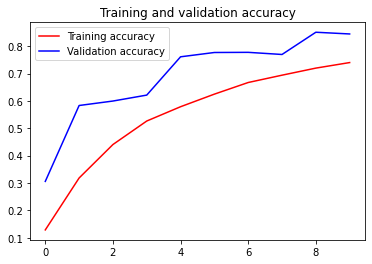

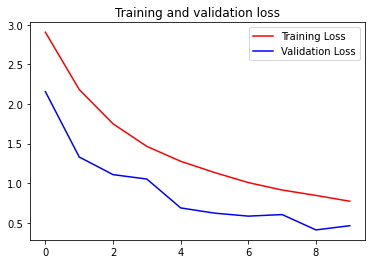

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()